In [ ]:
!pip install tensorflow

In [20]:
!pip install keras

In [72]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.0 MB 335.7 kB/s eta 0:00:23
   -- ------------------------------------- 0.5/8.0 MB 335.7 kB/s eta 0:00:23
   -- ------------------------------------- 0.5/8.0 MB 335.7 kB/s eta 0:00:23
   -- ------------------------------------- 0.5/8.0 MB 335.7 kB/s eta 0:00:23
   --- ------------------------------------ 0.8/8.0 MB 335.4 kB/s eta 0:00:22
   --- ------------------------------------ 0.8/8.0 MB 335.4 kB

In [105]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [9]:
dataset = pd.read_csv('dataset/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
cols = ['RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender']
dataset = dataset.drop(columns=cols, axis=1)
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


In [11]:
# checking the presence of null
dataset.isnull().sum()

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [58]:
# diving dataset into independent or dependent features (input or output)
input_dataset = dataset.iloc[:, :-1]
output_dataset = dataset.iloc[:, -1]

In [59]:
# Now scaling the input_dataset
from sklearn.preprocessing import StandardScaler

In [60]:
ss = StandardScaler()
input_scaled = ss.fit_transform(input_dataset)

In [61]:
# converting the input-scaled dataset into dataframe
input_dataset = pd.DataFrame(input_scaled, columns=input_dataset.columns)
input_dataset

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276
...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643
9998,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231


In [55]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6252,596,32,3,96709.07,2,0,0,41788.37
4684,623,43,1,0.00,2,1,1,146379.30
1731,601,44,4,0.00,2,1,0,58561.31
4742,506,59,8,119152.10,2,1,1,170679.74
4521,560,27,7,124995.98,1,1,1,114669.79
...,...,...,...,...,...,...,...,...
6412,602,53,5,98268.84,1,0,1,45038.29
8285,609,25,10,0.00,1,0,1,109895.16
7853,730,47,7,0.00,1,1,0,33373.26
1095,692,29,4,0.00,1,1,0,76755.99


In [25]:
input_dataset.shape

(10000, 8)

In [ ]:
# splitting into training and testing data


In [62]:
X_train, X_test, y_train, y_test = train_test_split(input_dataset, output_dataset, test_size=0.2, random_state=42)

In [63]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6252,-0.564197,-0.660018,-0.695982,0.324119,0.807737,-1.547768,-1.030670,-1.013811
4684,-0.284834,0.388871,-1.387538,-1.225848,0.807737,0.646092,0.970243,0.804921
1731,-0.512463,0.484225,-0.350204,-1.225848,0.807737,0.646092,-1.030670,-0.722147
4742,-1.495407,1.914528,1.032908,0.683816,0.807737,0.646092,0.970243,1.227481
4521,-0.936681,-1.136786,0.687130,0.777477,-0.911583,0.646092,0.970243,0.253524
...,...,...,...,...,...,...,...,...
6412,-0.502117,1.342407,-0.004426,0.349118,-0.911583,-1.547768,0.970243,-0.957298
8285,-0.429689,-1.327494,1.724464,-1.225848,-0.911583,-1.547768,0.970243,0.170498
7853,0.822271,0.770285,0.687130,-1.225848,-0.911583,0.646092,-1.030670,-1.160142
1095,0.429093,-0.946079,-0.350204,-1.225848,-0.911583,0.646092,-1.030670,-0.405759


In [31]:
X_train.shape

(8000, 8)

In [ ]:
# Creating Artificial Neural Network (ANN)

In [22]:
import tensorflow

In [119]:
from keras.layers import Dense
from keras.regularizers import L2
from keras.models import Sequential
from keras.callbacks import EarlyStopping

In [46]:
ann = Sequential()

In [149]:
ann.add(Dense(6, input_dim=8, activation='relu',kernel_regularizer=L2(l2=0.01)))
ann.add(Dense(4, activation='relu', kernel_regularizer=L2(l2=0.01)))
ann.add(Dense(2, activation='relu', kernel_regularizer=L2(l2=0.01)))
ann.add(Dense(1, activation='sigmoid'))

C:\Users\user\anaconda3\envs\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [150]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [151]:
ann.fit(X_train, y_train, batch_size=100, epochs=50, validation_data=(X_test, y_test), callbacks=EarlyStopping())

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.5234 - loss: 0.7679 - val_accuracy: 0.8035 - val_loss: 0.7317
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8021 - loss: 0.7224 - val_accuracy: 0.8035 - val_loss: 0.6952
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7955 - loss: 0.6887 - val_accuracy: 0.8035 - val_loss: 0.6648
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7925 - loss: 0.6606 - val_accuracy: 0.8035 - val_loss: 0.6390
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7924 - loss: 0.6368 - val_accuracy: 0.8035 - val_loss: 0.6175
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7980 - loss: 0.6147 - val_accuracy: 0.8035 - val_loss: 0.5990
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7917 - loss: 0.6003 - val_accuracy: 0.8035 - val_loss: 0.5837
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8023 - loss: 0.5809 - val_accuracy: 0.8035 - val_loss

In [152]:
ann.history

In [153]:
train_accuracy = ann.history.history['accuracy']
test_accuracy = ann.history.history['val_accuracy']

In [154]:
len(test_accuracy)

46

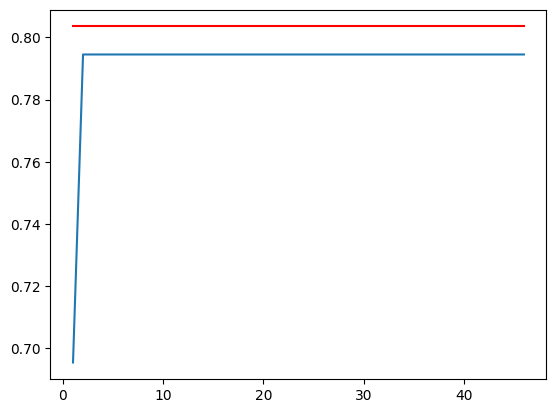

In [155]:
# plotting the train_accuracy and test_accuracy
plt.plot([i for i in range(1, 47)], train_accuracy)
plt.plot([i for i in range(1, 47)], test_accuracy, c='red')
plt.show()

In [156]:
prd1 = ann.predict(X_train)
prd_data1 = []
for i in prd1:
    if i[0] > 0.5:
        prd_data1.append(1)
    else:
        prd_data1.append(0)

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [157]:
prd = ann.predict(X_test)
prd_data = []
for i in prd:
    if i[0] > 0.5:
        prd_data.append(1)
    else:
        prd_data.append(0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [158]:
from sklearn.metrics import accuracy_score

In [159]:
accuracy_score(y_test, prd_data)*100

80.35

In [160]:
accuracy_score(y_train, prd_data1)*100

79.45

# For New Data

In [67]:
import numpy as np

In [68]:
input_data = np.array([[-0.564197, -0.660018, -0.695982, 0.324119, 0.807737, -1.547768, -1.030670, -1.013811]])

# Predict using the ANN model
prd = ann.predict(input_data)

# Process the prediction result
prd_data = []
for i in prd:
    if i[0] > 0.5:
        prd_data.append(1)
    else:
        prd_data.append(0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


In [69]:
y_test

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
6412    1
8285    0
7853    1
1095    1
6929    1
Name: Exited, Length: 2000, dtype: int64